# Statistics

In [1]:
%matplotlib inline

## Principal Component Analysis -- Related to SVD -- another way to reduce the dimensionality of data

We will consider the iris flower data.  Many other public data sets can be found on https://archive.ics.uci.edu/ml/datasets.html and other places.  

PCA allows one to determine which variables are "important" in a data set with many dimensions.  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


# Import the Iris flower data set
iris = datasets.load_iris()
X = iris.data[:, :4]  # We only take the first two features
Y = iris.target

# Inspect the data
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

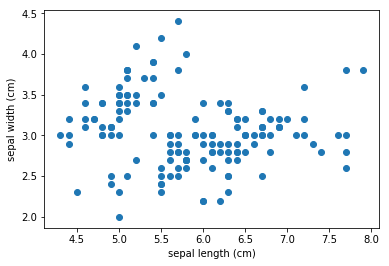

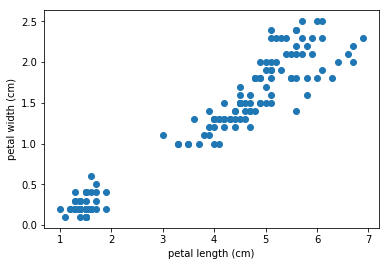

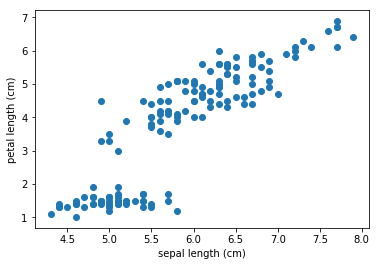

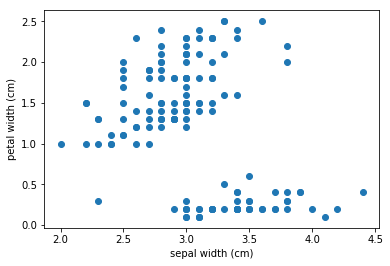

In [6]:
# Quick plot of a few combinations of the data variables

x = iris.data[:,0]
y = iris.data[:,1]
plt.figure()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(x,y)
plt.show()

x = iris.data[:,2]
y = iris.data[:,3]
plt.figure()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.scatter(x,y)
plt.show()

x = iris.data[:,0]
y = iris.data[:,2]
plt.figure()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.scatter(x,y)
plt.show()

x = iris.data[:,1]
y = iris.data[:,3]
plt.figure()
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[3])
plt.scatter(x,y)
plt.show()

Now replot colored by species.

In [8]:
# Define a function to avoid copying lines
def irisplot(iris,i,j):
    x = iris.data[:,i]
    y = iris.data[:,j]
    plt.figure()
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[j])
    plt.scatter(x,y, c=iris.target)  ##  color defined by the species name integer value
    plt.show()

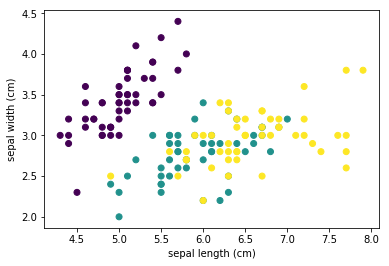

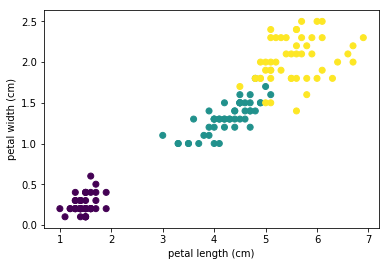

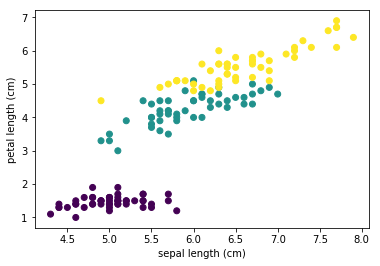

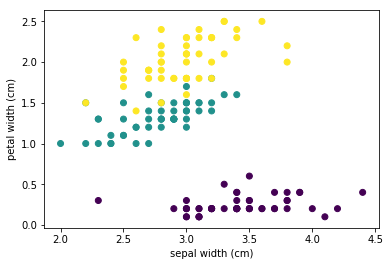

In [9]:
# Remake the same plots as above
(i,j) = (0,1)
irisplot(iris,i,j)

(i,j) = (2,3)
irisplot(iris,i,j)

(i,j) = (0,2)
irisplot(iris,i,j)

(i,j) = (1,3)
irisplot(iris,i,j)

In [ ]:
# 3D Plots can be helpful but become less useful with more than 3 dimensions

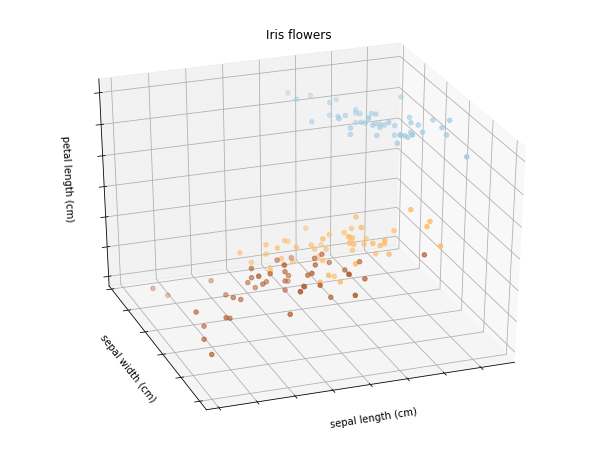

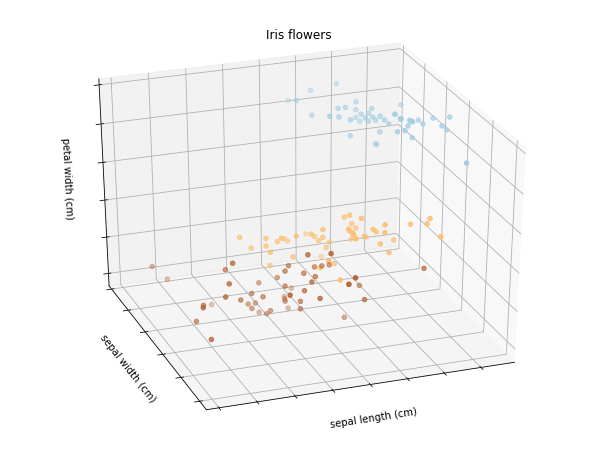

In [10]:
# Make some 3D plots of this Iris flower data.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=Y, cmap=plt.cm.Paired)
ax.set_title("Iris flowers")
ax.set_xlabel(iris.feature_names[0])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[2])
ax.w_zaxis.set_ticklabels([])
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=Y, cmap=plt.cm.Paired)
ax.set_title("Iris flowers")
ax.set_xlabel(iris.feature_names[0])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[3])
ax.w_zaxis.set_ticklabels([])
plt.show()

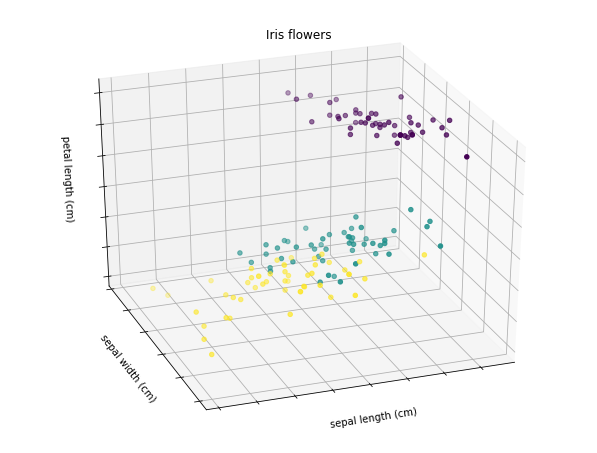

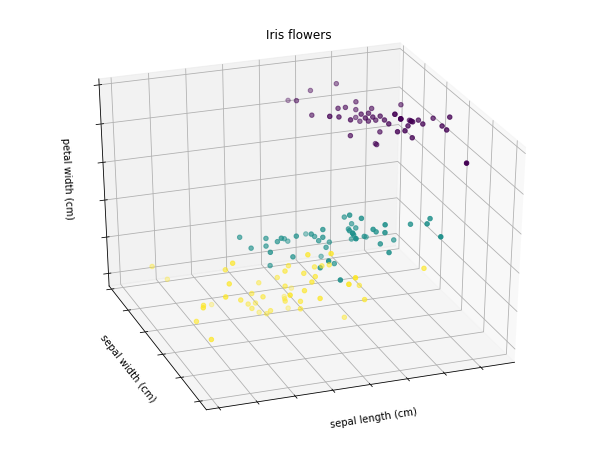

In [13]:
# Color same plots by species
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=Y)
ax.set_title("Iris flowers")
ax.set_xlabel(iris.feature_names[0])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[2])
ax.w_zaxis.set_ticklabels([])
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 3], c=Y)
ax.set_title("Iris flowers")
ax.set_xlabel(iris.feature_names[0])
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(iris.feature_names[1])
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(iris.feature_names[3])
ax.w_zaxis.set_ticklabels([])
plt.show()

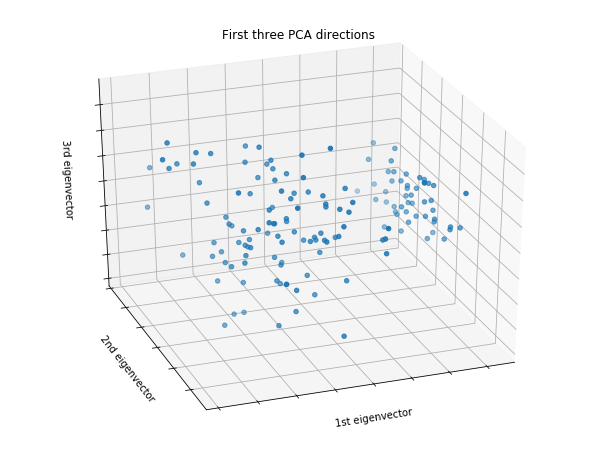

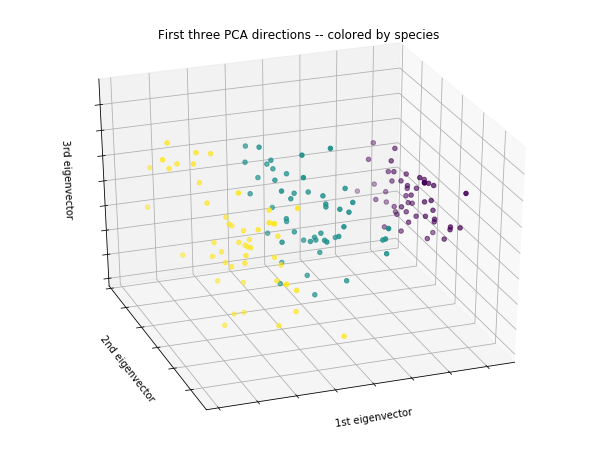

In [12]:
# To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions.  
# This can reveal clustering and "shape of data" that is not obvious by the usual direct plotting of properties.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2])
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y)
ax.set_title("First three PCA directions -- colored by species")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

## Exercise to do:
Explore Priciple Component Analysis on the Bird Migration Data.  
What can you learn from this analysis?  


## Topology 

Topology is a way of looking at the "shape" of the data.  It is a way of visualizing data with a large number of dimensions.  A network is built from the PCA components.

We will use the Kepler-Mapper python library.
https://github.com/MLWave/kepler-mapper

Note: Because this library only produces html page as an output, you will need to load it into a web browser to view the output.

In [15]:
import km
from sklearn import cluster

# The PCA axis are used as the "filter function", sometimes referred to a "lens" of the data.
# The "metric" is then the Euclidean distance between points defined by their position as seen in the PCA plots.

#datairis = numpy.zeros((len(X),3))
datairis = numpy.zeros((len(X),4))
datairis[:,0] = X_reduced[:,0]
datairis[:,1] = X_reduced[:,1]
datairis[:,2] = X_reduced[:,2]

km.np.genfromtxt('lion-reference.csv',delimiter=',')
mapper = km.KeplerMapper(verbose=1)
reduced = mapper.fit_transform(datairis, projection=[0,1])
#reduced = mapper.fit_transform(datairis)  ## default 
#complex = mapper.map(reduced, datairis)  ## default
complex = mapper.map(reduced, datairis, clusterer=cluster.DBSCAN(eps=.4, min_samples=3), nr_cubes=10, overlap_perc=0.3)
                                   #dimension_index=1, dimension_name="Y-axis")

mapper.visualize(complex, path_html="iris_keplermapper_outputtest1.html", title="iris1")

# This will save an html file defined by path_html.  
# You will need to load this file into your web browser to view the result.


..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (150, 2) using dimensions

Creating 1000 hypercubes.

created 34 edges and 28 nodes in 0:00:00.106666.

Wrote d3.js graph to 'iris_keplermapper_outputtest1.html'


## To Do:  Play with the topology plot -- try to separate out the 3 species into topological networks.  

Note that it will help to look at the documentation and the source python code.

## Extra To Do:  Download a data set that seems interesting.  Make your own plots of the data, including PCA and topology.  Find patterns and clusters.

Public data exists for many fields sociology, sports, biology, finance, astrophysics, climate, etc.  




In [4]:
import mayavi.mlab as mylab
x, y, z, value = np.random.random((4, 40))
mylab.points3d(x, y, z, value)
mylab.show()

ImportError: No module named mayavi.mlab